In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import os
from PIL import Image
import csv
from google.colab import files

# Descompactar os arquivos zip
for zip_filename in ['Cohesive.zip', 'Easyflowing.zip', 'Freeflowing.zip']:
  with zipfile.ZipFile(f'/content/{zip_filename}', 'r') as zip_ref:
    # Added a check to see if the directory already exists, and skip extraction if it does
    extract_path = os.path.join('/content/', os.path.splitext(zip_filename)[0])
    if not os.path.exists(extract_path):
        zip_ref.extractall('/content/')
    else:
        print(f"Skipping extraction of {zip_filename} as directory {extract_path} already exists.")

Skipping extraction of Cohesive.zip as directory /content/Cohesive already exists.
Skipping extraction of Easyflowing.zip as directory /content/Easyflowing already exists.
Skipping extraction of Freeflowing.zip as directory /content/Freeflowing already exists.


In [ ]:
#Divisão das imagens em 2x2
from PIL import Image
import os

# Nomes das pastas com imagens
folders = ['Cohesive', 'Easyflowing', 'Freeflowing']

# Caminho base no Colab
base_path = '/content/'

# Processa cada pasta
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    output_path = os.path.join(base_path, folder + '_split_2x2')

    # Cria a pasta de saída, se não existir
    os.makedirs(output_path, exist_ok=True)

    # Percorre os arquivos da pasta
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            w, h = img.size
            img_gray = img.convert('L')

            # Metade das dimensões
            w_mid = w // 2
            h_mid = h // 2

            # Divide a imagem em 4 partes
            crops = [
                img_gray.crop((0, 0, w_mid, h_mid)),                # canto superior esquerdo
                img_gray.crop((w_mid, 0, w, h_mid)),                # superior direito
                img_gray.crop((0, h_mid, w_mid, h)),                # inferior esquerdo
                img_gray.crop((w_mid, h_mid, w, h)),                # inferior direito
            ]

            # Salva os pedaços com nomes numerados
            base_name = os.path.splitext(filename)[0]
            for i, crop in enumerate(crops):
                crop.save(os.path.join(output_path, f"{base_name}_part{i+1}.jpg"))


print("Imagens divididas e salvas com sucesso!")


Imagens divididas e salvas com sucesso!


In [ ]:
#Transformando em 384x384
new_folder = ['Freeflowing_split_2x2', 'Cohesive_split_2x2', 'Easyflowing_split_2x2']

for folder in new_folder:

      folder_path = os.path.join(base_path, folder)

      for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            w, h = img.size

            #transformando em 384x384
            target_size = 384

            # Calcula o ponto central da imagem
            center_x = w // 2
            center_y = h // 2

            # Calcula as bordas do recorte central
            left = center_x - target_size // 2
            top = center_y - target_size // 2
            right = center_x + target_size // 2
            bottom = center_y + target_size // 2

            # Recorta a imagem
            cropped_img = img.crop((left, top, right, bottom))
            cropped_img.save(os.path.join(folder_path, filename))

In [ ]:
#Dividindo as imagens em 3x3

from PIL import Image
import os

# Nomes das pastas com imagens
folders = ['Cohesive', 'Easyflowing', 'Freeflowing']

# Caminho base no Colab
base_path = '/content/'

# Processa cada pasta
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    output_path = os.path.join(base_path, folder + '_split_3x3')

    # Cria a pasta de saída, se não existir
    os.makedirs(output_path, exist_ok=True)

    # Percorre os arquivos da pasta
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            w, h = img.size
        # Tamanhos dos blocos 3x3
        block_w = w // 3
        block_h = h // 3

        base_name = os.path.splitext(filename)[0]  # tira a extensão

        # Gera os 9 pedaços
        for row in range(3):
            for col in range(3):
                left = col * block_w
                top = row * block_h
                right = (col + 1) * block_w
                bottom = (row + 1) * block_h

                cropped = img.crop((left, top, right, bottom))

                # Nome do pedaço
                part_filename = f"{base_name}_{row}_{col}.jpg"
                cropped.save(os.path.join(output_path, part_filename))

print("Imagens divididas em 3x3 com sucesso!")

Imagens divididas em 3x3 com sucesso!


In [ ]:
#Transformando em 384x384
new_folder = ['Freeflowing_split_3x3', 'Cohesive_split_3x3', 'Easyflowing_split_3x3']

for folder in new_folder:

      folder_path = os.path.join(base_path, folder)

      for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path)
            w, h = img.size

            #transformando em 384x384
            target_size = 384

            # Calcula o ponto central da imagem
            center_x = w // 2
            center_y = h // 2

            # Calcula as bordas do recorte central
            left = center_x - target_size // 2
            top = center_y - target_size // 2
            right = center_x + target_size // 2
            bottom = center_y + target_size // 2

            # Recorta a imagem
            cropped_img = img.crop((left, top, right, bottom))
            cropped_img.save(os.path.join(folder_path, filename))

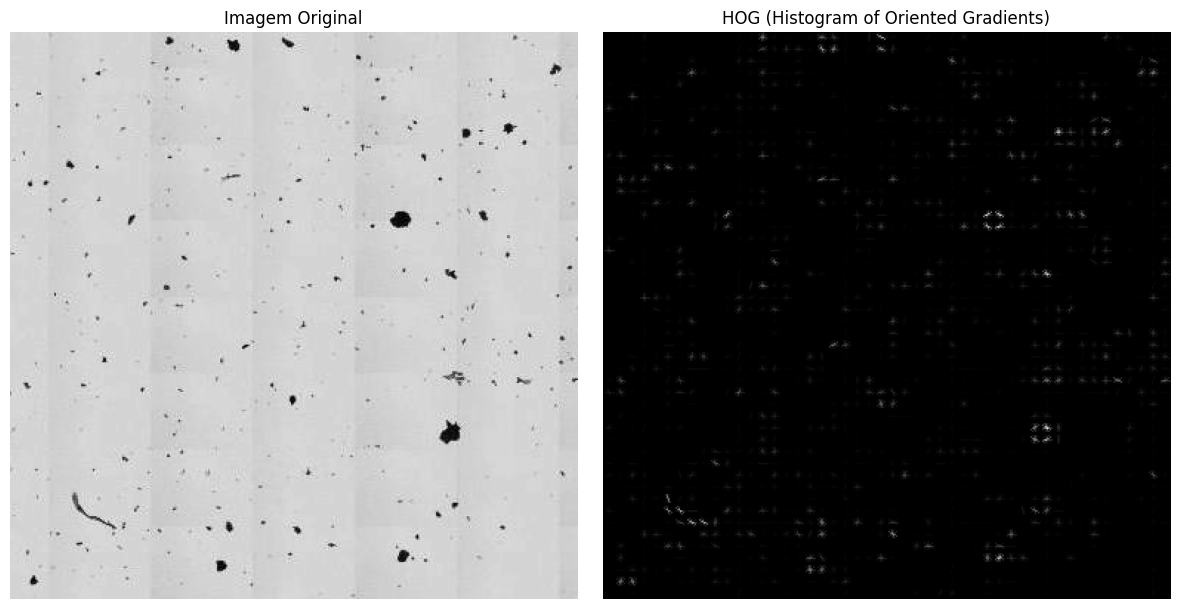

[0.34589781 0.         0.11530224 ... 0.04063366 0.         0.16768247]


In [ ]:
#Testando o HOG na imagem 2x2

from skimage.feature import hog
from skimage import color, io

imagem_teste = io.imread('/content/Cohesive_split_2x2/1-Octadecanol_part1.jpg')

features, hog_image = hog(
    imagem_teste,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    transform_sqrt=True
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

ax1.imshow(imagem_teste, cmap = 'gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

ax2.imshow(hog_image, cmap='gray')
ax2.set_title('HOG (Histogram of Oriented Gradients)')
ax2.axis('off')

plt.show()
print(features)

In [ ]:
#Extraindo descritor HOG em imagem com split 2x2

from skimage.feature import hog
from skimage import color, io
from PIL import Image
import os

new_folder = ['Freeflowing_split_2x2', 'Cohesive_split_2x2', 'Easyflowing_split_2x2']

dfs = []
for folder in new_folder:

      folder_path = os.path.join(base_path, folder)

      for filename in os.listdir(folder_path):
          if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
              img_path = os.path.join(folder_path, filename)
              imagem = io.imread(img_path)
              features, hog_image = hog(
                  imagem,
                  orientations=9,
                  pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2),
                  block_norm='L2-Hys',
                  visualize=True,
                  transform_sqrt=True
              )
              df_feature = pd.DataFrame(features)
              dfs.append(df_feature)

# Concatena os DataFrames em um único DataFrame
df_final = pd.concat(dfs,axis = 1, ignore_index=True)

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
0,0.018820,0.228767,0.121694,0.042166,0.047509,0.078203,0.012886,0.255816,0.234975,0.209661,...,0.234599,0.014528,0.116308,0.062730,0.475506,0.155859,0.235059,0.288998,0.282546,0.311770
1,0.007015,0.000000,0.027507,0.000000,0.013338,0.000000,0.000000,0.004605,0.032725,0.000000,...,0.234599,0.000000,0.040673,0.035096,0.000000,0.060288,0.110506,0.094081,0.000000,0.135738
2,0.026844,0.000000,0.165815,0.000000,0.056916,0.060208,0.000000,0.000000,0.088246,0.000000,...,0.234599,0.000000,0.044497,0.000000,0.000000,0.020138,0.051806,0.071693,0.000000,0.020924
3,0.056349,0.000000,0.082400,0.000000,0.032099,0.015883,0.000000,0.000000,0.064595,0.000000,...,0.234599,0.046445,0.054393,0.046299,0.000000,0.075858,0.181551,0.061097,0.046591,0.267825
4,0.252579,0.000000,0.258558,0.018160,0.112775,0.113908,0.100415,0.002057,0.319325,0.119409,...,0.234599,0.324881,0.196799,0.035171,0.000000,0.187006,0.282505,0.288998,0.145565,0.231070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79519,0.081046,0.324969,0.346407,0.158560,0.255234,0.206596,0.016291,0.334183,0.016893,0.035080,...,0.081231,0.297992,0.094904,0.187100,0.238689,0.280384,0.260083,0.410291,0.155472,0.128356
79520,0.151400,0.336228,0.000000,0.017172,0.100899,0.031950,0.000000,0.051262,0.018881,0.000000,...,0.101764,0.116737,0.034752,0.087840,0.257771,0.085042,0.114167,0.248511,0.032588,0.038079
79521,0.079493,0.022998,0.029528,0.038627,0.010983,0.141368,0.044928,0.154890,0.023906,0.012377,...,0.181349,0.123854,0.056618,0.043397,0.095966,0.161629,0.038399,0.407232,0.132131,0.016345
79522,0.003043,0.000000,0.000000,0.276252,0.156895,0.047961,0.000000,0.076767,0.000000,0.000000,...,0.058764,0.064734,0.157245,0.129284,0.043127,0.280384,0.057757,0.175977,0.000000,0.036707


In [ ]:
df_final.columns = [f'Foto_{i}' for i in range(len(df_final.columns))]

In [ ]:
df_final

,Foto_0,Foto_1,Foto_2,Foto_3,Foto_4,Foto_5,Foto_6,Foto_7,Foto_8,Foto_9,...,Foto_378,Foto_379,Foto_380,Foto_381,Foto_382,Foto_383,Foto_384,Foto_385,Foto_386,Foto_387
0,0.018820,0.228767,0.121694,0.042166,0.047509,0.078203,0.012886,0.255816,0.234975,0.209661,...,0.234599,0.014528,0.116308,0.062730,0.475506,0.155859,0.235059,0.288998,0.282546,0.311770
1,0.007015,0.000000,0.027507,0.000000,0.013338,0.000000,0.000000,0.004605,0.032725,0.000000,...,0.234599,0.000000,0.040673,0.035096,0.000000,0.060288,0.110506,0.094081,0.000000,0.135738
2,0.026844,0.000000,0.165815,0.000000,0.056916,0.060208,0.000000,0.000000,0.088246,0.000000,...,0.234599,0.000000,0.044497,0.000000,0.000000,0.020138,0.051806,0.071693,0.000000,0.020924
3,0.056349,0.000000,0.082400,0.000000,0.032099,0.015883,0.000000,0.000000,0.064595,0.000000,...,0.234599,0.046445,0.054393,0.046299,0.000000,0.075858,0.181551,0.061097,0.046591,0.267825
4,0.252579,0.000000,0.258558,0.018160,0.112775,0.113908,0.100415,0.002057,0.319325,0.119409,...,0.234599,0.324881,0.196799,0.035171,0.000000,0.187006,0.282505,0.288998,0.145565,0.231070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79519,0.081046,0.324969,0.346407,0.158560,0.255234,0.206596,0.016291,0.334183,0.016893,0.035080,...,0.081231,0.297992,0.094904,0.187100,0.238689,0.280384,0.260083,0.410291,0.155472,0.128356
79520,0.151400,0.336228,0.000000,0.017172,0.100899,0.031950,0.000000,0.051262,0.018881,0.000000,...,0.101764,0.116737,0.034752,0.087840,0.257771,0.085042,0.114167,0.248511,0.032588,0.038079
79521,0.079493,0.022998,0.029528,0.038627,0.010983,0.141368,0.044928,0.154890,0.023906,0.012377,...,0.181349,0.123854,0.056618,0.043397,0.095966,0.161629,0.038399,0.407232,0.132131,0.016345
79522,0.003043,0.000000,0.000000,0.276252,0.156895,0.047961,0.000000,0.076767,0.000000,0.000000,...,0.058764,0.064734,0.157245,0.129284,0.043127,0.280384,0.057757,0.175977,0.000000,0.036707


In [ ]:
df_Transposto = df_final.T

In [ ]:
df_Transposto

,0,1,2,3,4,5,6,7,8,9,...,79514,79515,79516,79517,79518,79519,79520,79521,79522,79523
Foto_0,0.018820,0.007015,0.026844,0.056349,0.252579,0.145642,0.055812,0.036651,0.000000,0.352652,...,0.089042,0.042895,0.016009,0.025413,0.000000,0.081046,0.151400,0.079493,0.003043,0.000000
Foto_1,0.228767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388257,...,0.320840,0.048695,0.000000,0.011548,0.318061,0.324969,0.336228,0.022998,0.000000,0.000000
Foto_2,0.121694,0.027507,0.165815,0.082400,0.258558,0.109785,0.258558,0.234859,0.000000,0.258558,...,0.346407,0.104598,0.093529,0.059137,0.000000,0.346407,0.000000,0.029528,0.000000,0.000000
Foto_3,0.042166,0.000000,0.000000,0.000000,0.018160,0.006765,0.000000,0.000000,0.000000,0.126565,...,0.236882,0.276252,0.232726,0.054629,0.034531,0.158560,0.017172,0.038627,0.276252,0.113017
Foto_4,0.047509,0.013338,0.056916,0.032099,0.112775,0.025529,0.050446,0.013290,0.009472,0.041537,...,0.000000,0.326215,0.212800,0.038697,0.125174,0.255234,0.100899,0.010983,0.156895,0.024430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_383,0.155859,0.060288,0.020138,0.075858,0.187006,0.068853,0.037610,0.075620,0.104375,0.249745,...,0.061305,0.280384,0.020459,0.009675,0.115328,0.280384,0.085042,0.161629,0.280384,0.168497
Foto_384,0.235059,0.110506,0.051806,0.181551,0.282505,0.072060,0.019791,0.103683,0.282505,0.282505,...,0.262870,0.153194,0.153667,0.041126,0.147185,0.260083,0.114167,0.038399,0.057757,0.117652
Foto_385,0.288998,0.094081,0.071693,0.061097,0.288998,0.256008,0.075278,0.227669,0.028226,0.106653,...,0.044851,0.410291,0.361163,0.054464,0.410291,0.410291,0.248511,0.407232,0.175977,0.053451
Foto_386,0.282546,0.000000,0.000000,0.046591,0.145565,0.000000,0.029381,0.000000,0.000000,0.282546,...,0.181628,0.114160,0.000000,0.087881,0.092558,0.155472,0.032588,0.132131,0.000000,0.000000


In [ ]:
df_Transposto.columns = [f'Feature_{i}' for i in range(len(df_Transposto.columns))]

In [ ]:
df_Transposto

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_79514,Feature_79515,Feature_79516,Feature_79517,Feature_79518,Feature_79519,Feature_79520,Feature_79521,Feature_79522,Feature_79523
Foto_0,0.018820,0.007015,0.026844,0.056349,0.252579,0.145642,0.055812,0.036651,0.000000,0.352652,...,0.089042,0.042895,0.016009,0.025413,0.000000,0.081046,0.151400,0.079493,0.003043,0.000000
Foto_1,0.228767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388257,...,0.320840,0.048695,0.000000,0.011548,0.318061,0.324969,0.336228,0.022998,0.000000,0.000000
Foto_2,0.121694,0.027507,0.165815,0.082400,0.258558,0.109785,0.258558,0.234859,0.000000,0.258558,...,0.346407,0.104598,0.093529,0.059137,0.000000,0.346407,0.000000,0.029528,0.000000,0.000000
Foto_3,0.042166,0.000000,0.000000,0.000000,0.018160,0.006765,0.000000,0.000000,0.000000,0.126565,...,0.236882,0.276252,0.232726,0.054629,0.034531,0.158560,0.017172,0.038627,0.276252,0.113017
Foto_4,0.047509,0.013338,0.056916,0.032099,0.112775,0.025529,0.050446,0.013290,0.009472,0.041537,...,0.000000,0.326215,0.212800,0.038697,0.125174,0.255234,0.100899,0.010983,0.156895,0.024430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_383,0.155859,0.060288,0.020138,0.075858,0.187006,0.068853,0.037610,0.075620,0.104375,0.249745,...,0.061305,0.280384,0.020459,0.009675,0.115328,0.280384,0.085042,0.161629,0.280384,0.168497
Foto_384,0.235059,0.110506,0.051806,0.181551,0.282505,0.072060,0.019791,0.103683,0.282505,0.282505,...,0.262870,0.153194,0.153667,0.041126,0.147185,0.260083,0.114167,0.038399,0.057757,0.117652
Foto_385,0.288998,0.094081,0.071693,0.061097,0.288998,0.256008,0.075278,0.227669,0.028226,0.106653,...,0.044851,0.410291,0.361163,0.054464,0.410291,0.410291,0.248511,0.407232,0.175977,0.053451
Foto_386,0.282546,0.000000,0.000000,0.046591,0.145565,0.000000,0.029381,0.000000,0.000000,0.282546,...,0.181628,0.114160,0.000000,0.087881,0.092558,0.155472,0.032588,0.132131,0.000000,0.000000


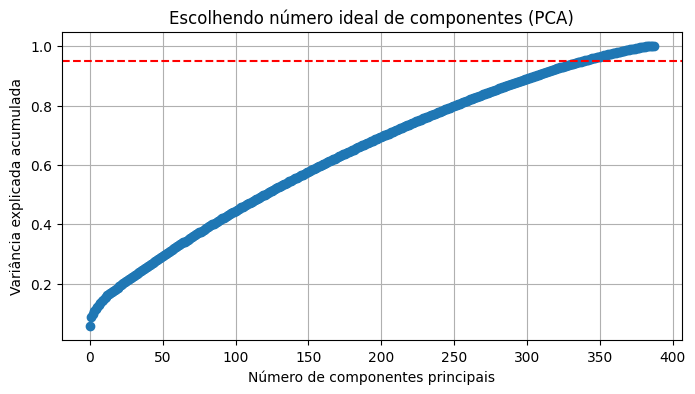

In [ ]:
#Entendendo qual a dimensão do PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df_Transposto)

# Variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Soma acumulada da variância explicada
cumulative_variance = np.cumsum(explained_variance)

# Visualizar
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Número de componentes principais')
plt.ylabel('Variância explicada acumulada')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # linha dos 95%
plt.title('Escolhendo número ideal de componentes (PCA)')
plt.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=350)  # Reduz para 350 dimensões
df_reduzido = pca.fit_transform(df_Transposto)
df_hog = pd.DataFrame(df_reduzido)
df_hog

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,-6.747728,-2.550221,-0.505724,-0.138713,1.026434,1.502851,0.166224,0.011656,0.187465,0.570253,...,0.304827,-0.215818,-0.593218,0.637525,0.560047,-0.258085,-0.042131,0.394506,-0.398613,-0.032082
1,12.537652,-5.719456,-2.558606,1.086331,-2.260155,-3.336257,-0.509945,-2.868807,0.346047,2.091210,...,0.042658,0.540637,0.432487,-0.432951,0.270877,-0.768345,-0.355922,-0.459280,-0.174667,0.090243
2,1.967176,-5.853335,7.150070,-3.403652,6.698466,5.558200,1.987721,-2.839611,-0.127795,3.001149,...,0.825404,-0.594162,0.027456,0.115387,1.222618,-0.390779,0.245628,0.437258,0.565350,-0.478066
3,-1.191724,5.944507,5.441874,5.486297,0.987598,-2.385828,-0.644037,-0.285098,0.296751,0.852250,...,-0.060277,0.103034,-0.572966,-0.100463,-0.064771,-0.501607,0.195236,0.375575,-0.143293,-0.051927
4,-2.800709,-3.573890,3.381000,-1.760753,2.626379,2.992665,0.888570,-1.557620,0.843503,0.609994,...,0.386225,-0.392490,-0.159708,0.041556,0.051728,0.272141,0.495585,0.118307,0.227958,0.511656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,-9.951922,-1.553526,-2.566894,0.839116,-0.377994,0.416776,-1.130251,-0.935763,0.175105,-1.050506,...,0.885850,1.700557,0.057073,-0.265122,0.930698,1.602193,1.121806,-0.560188,0.533492,1.920588
384,-10.133522,-1.506951,-3.312812,1.109317,-0.380426,0.267259,-0.817830,-0.737817,0.335800,-1.515518,...,0.072855,0.019273,0.295681,-0.302893,-0.855934,0.471961,0.963453,-0.175036,0.794887,-0.679186
385,-6.273059,0.785949,-1.544826,0.904348,-0.126540,0.589593,0.568966,0.218678,-0.298206,0.034705,...,-0.069626,0.670887,-0.019838,-0.752407,-0.067002,0.097628,0.023452,-0.086927,-0.656979,-0.645972
386,2.961018,-4.710456,-0.609897,0.746278,2.539033,-0.024673,-0.462126,1.182072,1.560858,-3.666453,...,0.168571,0.237096,-0.338799,-0.105100,-0.535963,0.011803,-0.078756,0.020500,0.473594,-0.409415


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalizado = scaler.fit_transform(df_hog)
df_hog = pd.DataFrame(normalizado)
df_hog

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,-0.966522,-0.500102,-0.162539,-0.050790,0.378541,0.592698,0.071548,0.005202,0.085063,0.264549,...,0.285215,-0.202825,-0.558604,0.603191,0.530848,-0.245614,-0.040165,0.377063,-0.382588,-0.030844
1,1.795851,-1.121593,-0.822332,0.397759,-0.833528,-1.315762,-0.219496,-1.280380,0.157021,0.970144,...,0.039914,0.508091,0.407251,-0.409634,0.256755,-0.731217,-0.339310,-0.438973,-0.167645,0.086761
2,0.281772,-1.147847,2.298021,-1.246245,2.470343,2.192057,0.855575,-1.267350,-0.057988,1.392279,...,0.772298,-0.558393,0.025854,0.109173,1.158874,-0.371895,0.234164,0.417924,0.542622,-0.459618
3,-0.170698,1.165726,1.749009,2.008803,0.364218,-0.940929,-0.277213,-0.127242,0.134653,0.395372,...,-0.056399,0.096831,-0.539533,-0.095052,-0.061394,-0.477368,0.186124,0.358969,-0.137532,-0.049924
4,-0.401164,-0.700844,1.086648,-0.644698,0.968589,1.180255,0.382467,-0.695183,0.382746,0.282985,...,0.361376,-0.368862,-0.150389,0.039318,0.049031,0.258991,0.472456,0.113076,0.218794,0.491912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,-1.425479,-0.304649,-0.824996,0.307242,-0.139401,0.164369,-0.486494,-0.417641,0.079455,-0.487346,...,0.828855,1.598182,0.053742,-0.250843,0.882174,1.524772,1.069449,-0.535419,0.512045,1.846476
384,-1.451491,-0.295515,-1.064732,0.406176,-0.140298,0.105402,-0.352019,-0.329296,0.152372,-0.703072,...,0.068168,0.018113,0.278428,-0.286580,-0.811308,0.449155,0.918488,-0.167296,0.762931,-0.652977
385,-0.898532,0.154126,-0.496505,0.331126,-0.046667,0.232525,0.244900,0.097598,-0.135313,0.016100,...,-0.065146,0.630499,-0.018680,-0.711885,-0.063509,0.092910,0.022358,-0.083083,-0.630568,-0.621045
386,0.424126,-0.923727,-0.196020,0.273249,0.936376,-0.009730,-0.198913,0.527572,0.708251,-1.700923,...,0.157725,0.222823,-0.319030,-0.099440,-0.508019,0.011232,-0.075081,0.019594,0.454555,-0.393616


In [ ]:
#organizando o DataFrame
df_hog.columns = [f'Feature_HOG_{i}' for i in range(1, len(df_hog.columns) +1)]
df_hog.index = [f'Foto_{i}' for i in range(1, len(df_hog.index) + 1)]  # índice começa no 1
df_hog.index.name = 'ImageId'
df_hog['Classe'] = ''

for i in df_hog.index:
    df_hog.iloc[0:132, -1] = 'Freeflowing'
    df_hog.iloc[132:252, -1] = 'Cohesive'
    df_hog.iloc[252:, -1] = 'Easyflowing'

df_hog

,Feature_HOG_1,Feature_HOG_2,Feature_HOG_3,Feature_HOG_4,Feature_HOG_5,Feature_HOG_6,Feature_HOG_7,Feature_HOG_8,Feature_HOG_9,Feature_HOG_10,...,Feature_HOG_342,Feature_HOG_343,Feature_HOG_344,Feature_HOG_345,Feature_HOG_346,Feature_HOG_347,Feature_HOG_348,Feature_HOG_349,Feature_HOG_350,Classe
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,-0.966522,-0.500102,-0.162539,-0.050790,0.378541,0.592698,0.071548,0.005202,0.085063,0.264549,...,-0.202825,-0.558604,0.603191,0.530848,-0.245614,-0.040165,0.377063,-0.382588,-0.030844,Freeflowing
Foto_2,1.795851,-1.121593,-0.822332,0.397759,-0.833528,-1.315762,-0.219496,-1.280380,0.157021,0.970144,...,0.508091,0.407251,-0.409634,0.256755,-0.731217,-0.339310,-0.438973,-0.167645,0.086761,Freeflowing
Foto_3,0.281772,-1.147847,2.298021,-1.246245,2.470343,2.192057,0.855575,-1.267350,-0.057988,1.392279,...,-0.558393,0.025854,0.109173,1.158874,-0.371895,0.234164,0.417924,0.542622,-0.459618,Freeflowing
Foto_4,-0.170698,1.165726,1.749009,2.008803,0.364218,-0.940929,-0.277213,-0.127242,0.134653,0.395372,...,0.096831,-0.539533,-0.095052,-0.061394,-0.477368,0.186124,0.358969,-0.137532,-0.049924,Freeflowing
Foto_5,-0.401164,-0.700844,1.086648,-0.644698,0.968589,1.180255,0.382467,-0.695183,0.382746,0.282985,...,-0.368862,-0.150389,0.039318,0.049031,0.258991,0.472456,0.113076,0.218794,0.491912,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_384,-1.425479,-0.304649,-0.824996,0.307242,-0.139401,0.164369,-0.486494,-0.417641,0.079455,-0.487346,...,1.598182,0.053742,-0.250843,0.882174,1.524772,1.069449,-0.535419,0.512045,1.846476,Easyflowing
Foto_385,-1.451491,-0.295515,-1.064732,0.406176,-0.140298,0.105402,-0.352019,-0.329296,0.152372,-0.703072,...,0.018113,0.278428,-0.286580,-0.811308,0.449155,0.918488,-0.167296,0.762931,-0.652977,Easyflowing
Foto_386,-0.898532,0.154126,-0.496505,0.331126,-0.046667,0.232525,0.244900,0.097598,-0.135313,0.016100,...,0.630499,-0.018680,-0.711885,-0.063509,0.092910,0.022358,-0.083083,-0.630568,-0.621045,Easyflowing


In [ ]:
#Salvando o dataframe do hog em um csv
df_hog.to_csv('features_2x2_hog.csv')

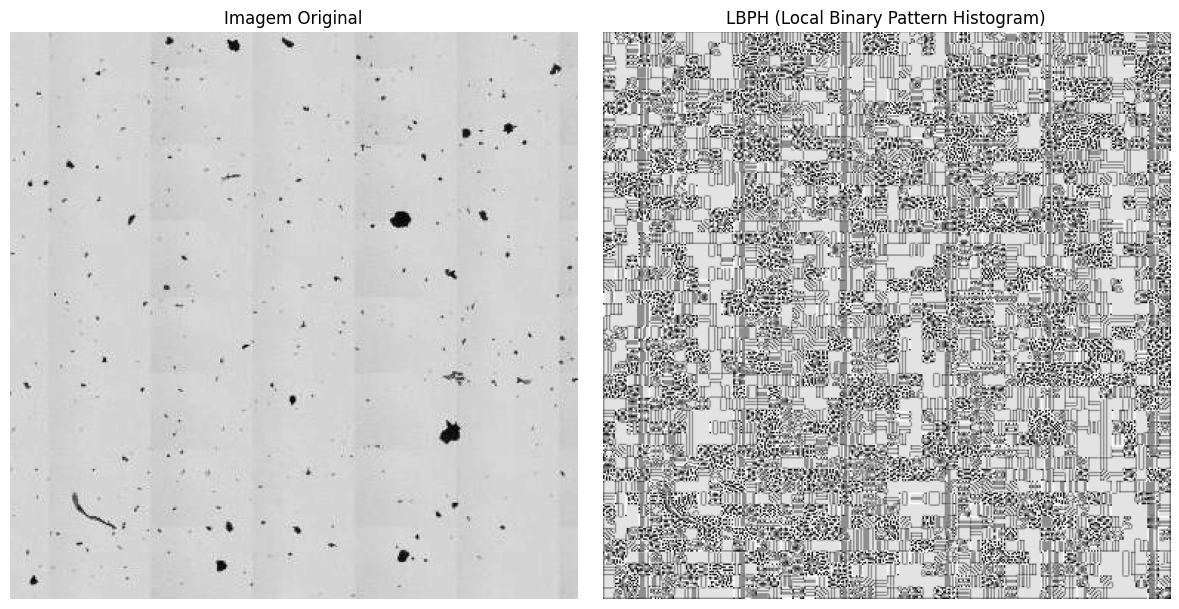

In [ ]:
#Testando LBPH para uma imagem 2x2
from skimage.feature import local_binary_pattern
from skimage import io, color
import numpy as np
import pandas as pd
import os

# Parâmetros do LBP
radius = 1
n_points = 8 * radius
METHOD = 'uniform'

# Caminho da imagem
img_path = '/content/Cohesive_split_2x2/1-Octadecanol_part1.jpg'

# Carregar e converter para escala de cinza
img = io.imread(img_path)

# Aplicar LBP
lbp = local_binary_pattern(img, P=n_points, R=radius, method=METHOD)

# Criar histograma dos padrões
n_bins = int(lbp.max() + 1)
hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)

#plotar imagem
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

ax1.imshow(img, cmap = 'gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

ax2.imshow(lbp, cmap='gray')
ax2.set_title('LBPH (Local Binary Pattern Histogram)')
ax2.axis('off')

plt.show()



In [ ]:
#Extraindo descritor LBP em imagem com split 2x2

from PIL import Image
from skimage.feature import local_binary_pattern
from skimage import io, color
import os

new_folder = ['Freeflowing_split_2x2', 'Cohesive_split_2x2', 'Easyflowing_split_2x2']

dfs = []
for folder in new_folder:

      folder_path = os.path.join(base_path, folder)

      for filename in os.listdir(folder_path):
          if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
              img_path = os.path.join(folder_path, filename)
              imagem = io.imread(img_path)

              # Aplicando o LBP
              radius = 1
              n_points = 8 * radius
              METHOD = 'uniform'
              lbp_img = local_binary_pattern(imagem, P=n_points, R=radius, method=METHOD)
              n_bins = int(lbp_img.max() + 1)
              hist, _ = np.histogram(lbp_img.ravel(), bins=n_bins, range=(0, n_bins), density=True)
              df_feature = pd.DataFrame(hist)
              dfs.append(df_feature)

# Concatena os DataFrames em um único DataFrame
df_final = pd.concat(dfs,axis = 1, ignore_index=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalizado = scaler.fit_transform(df_final)
df_normalizado = pd.DataFrame(normalizado)
df_normalizado

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
0,-0.518991,-0.656940,-1.021886,-1.077125,-1.049946,-0.723998,-0.712548,-1.112114,-0.698429,-0.651813,...,0.500212,-0.992238,-0.043999,-0.676500,-0.774026,1.038610,1.061515,-0.789645,-0.806597,-0.707203
1,-0.107627,-0.556526,-0.704129,-0.679460,-0.615233,-0.549691,-0.535718,-0.593410,-0.576683,-0.546334,...,0.400307,-0.697863,0.267560,-0.519650,-0.532499,0.166092,0.200808,-0.284348,-0.588509,-0.325478
2,-1.732197,-0.683426,-1.053477,-1.177842,-1.439097,-1.001162,-0.898021,-1.399500,-0.761629,-0.699394,...,-1.200045,-1.084044,-1.427069,-0.840928,-0.983394,-1.056260,-0.983160,-1.581309,-0.949908,-1.688520
3,-0.714230,-0.267897,0.008714,-0.066688,-0.194201,-0.387800,-0.367964,-0.191664,-0.276554,-0.282486,...,-1.155887,-0.013652,-0.911119,-0.385338,-0.364856,-1.117280,-1.066415,-0.651185,-0.310865,-0.546019
4,-0.576564,-0.514759,-0.290635,-0.238465,-0.328436,-0.531849,-0.524698,-0.273969,-0.478210,-0.514731,...,-0.907534,-0.337354,-0.800178,-0.566685,-0.527798,-0.954397,-1.006744,-0.522173,-0.460264,-0.600695
5,0.804821,1.150753,1.746369,1.697965,1.716833,1.220756,1.167104,1.748001,1.154724,1.107595,...,-0.097337,1.627469,0.081688,1.175520,1.203383,-0.401567,-0.614561,1.144558,1.356641,1.114979
6,-0.475766,-0.363993,-0.229222,-0.238946,-0.275129,-0.380400,-0.386259,-0.230651,-0.365942,-0.370722,...,-0.294953,-0.277000,-0.523941,-0.369071,-0.347869,-0.527862,-0.594840,-0.426228,-0.323354,-0.465427
7,0.249252,-0.334839,-0.083085,-0.067555,0.071170,-0.152403,-0.190774,0.021709,-0.272909,-0.312320,...,0.205196,-0.035753,0.338549,-0.237307,-0.169424,0.221035,0.254685,0.118326,-0.199635,0.279798
8,1.201474,2.597877,2.003677,1.991063,1.778013,2.465405,2.536291,1.779932,2.580618,2.619033,...,0.134887,2.103926,0.652509,2.550326,2.477979,0.402759,0.618912,1.737492,2.406647,1.587997
9,1.869827,-0.370251,-0.376324,-0.142948,0.336025,0.041143,-0.087414,0.251666,-0.304986,-0.348828,...,2.415154,-0.293491,2.366000,-0.130367,0.018504,2.228871,2.129800,1.254511,-0.124156,1.350568


In [ ]:
#organizando o dataframe
df_lbp = df_normalizado.T
df_lbp.columns = [f'Feature_LBP_{i}' for i in range(1,len(df_lbp.columns)+1)]
df_lbp.index = [f'Foto_{i}' for i in range(1, len(df_lbp.index)+1)]
df_lbp.index.name = 'ImageId'
df_lbp['Classe'] = ''
for i in df_lbp.index:
    df_lbp.iloc[0:132, -1] = 'Freeflowing'
    df_lbp.iloc[132:252, -1] = 'Cohesive'
    df_lbp.iloc[252:, -1] = 'Easyflowing'
df_lbp

,Feature_LBP_1,Feature_LBP_2,Feature_LBP_3,Feature_LBP_4,Feature_LBP_5,Feature_LBP_6,Feature_LBP_7,Feature_LBP_8,Feature_LBP_9,Feature_LBP_10,Classe
ImageId,,,,,,,,,,,
Foto_1,-0.518991,-0.107627,-1.732197,-0.714230,-0.576564,0.804821,-0.475766,0.249252,1.201474,1.869827,Freeflowing
Foto_2,-0.656940,-0.556526,-0.683426,-0.267897,-0.514759,1.150753,-0.363993,-0.334839,2.597877,-0.370251,Freeflowing
Foto_3,-1.021886,-0.704129,-1.053477,0.008714,-0.290635,1.746369,-0.229222,-0.083085,2.003677,-0.376324,Freeflowing
Foto_4,-1.077125,-0.679460,-1.177842,-0.066688,-0.238465,1.697965,-0.238946,-0.067555,1.991063,-0.142948,Freeflowing
Foto_5,-1.049946,-0.615233,-1.439097,-0.194201,-0.328436,1.716833,-0.275129,0.071170,1.778013,0.336025,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...
Foto_384,1.038610,0.166092,-1.056260,-1.117280,-0.954397,-0.401567,-0.527862,0.221035,0.402759,2.228871,Easyflowing
Foto_385,1.061515,0.200808,-0.983160,-1.066415,-1.006744,-0.614561,-0.594840,0.254685,0.618912,2.129800,Easyflowing
Foto_386,-0.789645,-0.284348,-1.581309,-0.651185,-0.522173,1.144558,-0.426228,0.118326,1.737492,1.254511,Easyflowing


In [ ]:
#Salvando o dataframe do lbp em um csv
df_lbp.to_csv('features_2x2_lbp.csv')

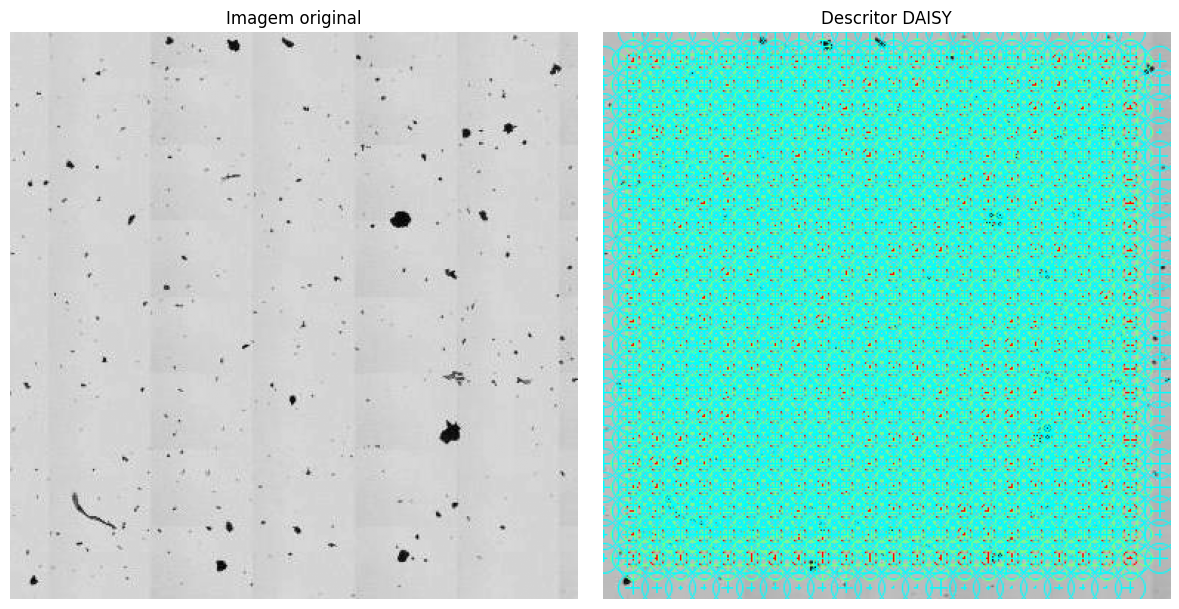

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.025423,0.024313,0.017706,0.023891,0.027726,0.022435,0.026851,0.023941,0.026256,0.025760,...,0.066352,0.072815,0.012837,0.016017,0.012787,0.015916,0.034686,0.026727,0.029800,0.024112
1,0.013764,0.013490,0.020187,0.013746,0.016823,0.020835,0.022527,0.016951,0.010473,0.011625,...,0.041028,0.040325,0.022870,0.022299,0.019483,0.021468,0.027432,0.024275,0.030044,0.023463
2,0.028073,0.030864,0.024993,0.025568,0.055861,0.069940,0.057283,0.060145,0.080532,0.076041,...,0.031210,0.030356,0.013706,0.012458,0.013494,0.011936,0.006778,0.007428,0.008031,0.007214
3,0.027031,0.034797,0.030529,0.031747,0.004112,0.004086,0.004252,0.004277,0.035627,0.040993,...,0.027350,0.029558,0.028961,0.030757,0.029489,0.028478,0.006672,0.006533,0.006010,0.005883
4,0.015534,0.014887,0.013150,0.014985,0.073997,0.078435,0.058463,0.077814,0.007065,0.005188,...,0.024418,0.024568,0.031872,0.036222,0.032504,0.034292,0.019321,0.015227,0.013668,0.014252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.010758,0.008686,0.009607,0.008947,0.014105,0.007918,0.009035,0.007821,0.006798,0.004611,...,0.006778,0.005957,0.082296,0.082875,0.089690,0.084161,0.042418,0.038406,0.040776,0.041029
480,0.027552,0.023444,0.025950,0.024080,0.036985,0.046069,0.044504,0.047442,0.013750,0.012537,...,0.012320,0.010546,0.046501,0.045567,0.049658,0.045912,0.056265,0.052687,0.057676,0.054436
481,0.020817,0.027503,0.030424,0.028854,0.009725,0.009411,0.009747,0.008242,0.012106,0.013199,...,0.012551,0.010348,0.030084,0.025790,0.027490,0.026265,0.060183,0.063090,0.062124,0.062345
482,0.008851,0.009347,0.007402,0.005817,0.007254,0.005104,0.005789,0.003624,0.009804,0.006370,...,0.008583,0.008570,0.050202,0.055774,0.058109,0.057026,0.081330,0.089711,0.083527,0.089500


In [ ]:
#testar o DAISY em uma imagem 2x2

from skimage.feature import daisy
from skimage import io, color
import matplotlib.pyplot as plt

# Carrega a imagem e converte para escala de cinza
img = io.imread('/content/Cohesive_split_2x2/1-Octadecanol_part1.jpg')

step = 16         # Menor step = mais pontos de amostragem
radius = 20       # Tamanho da "florzinha"
rings = 2          # Quantos anéis
histograms = 4     # Quantas divisões por anel
orientations = 4   # Direções dos gradientes


# Aplica o descritor DAISY com visualização
daisy_descs, daisy_image = daisy(
    img,
    step= step,              # espaço entre os pontos
    radius= radius,           # raio dos anéis
    rings= rings,             # número de anéis
    histograms= histograms,        # setores angulares por anel
    orientations= orientations,      # quantas direções de gradiente
    visualize=True       # queremos a imagem visual!
)
features = daisy_descs.reshape(-1, daisy_descs.shape[-1])
pd.DataFrame(features)

# Plotar imagem original e visualização do DAISY
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Imagem original')
ax[0].axis('off')

ax[1].imshow(daisy_image, cmap='gray')
ax[1].set_title('Descritor DAISY')
ax[1].axis('off')

plt.tight_layout()
plt.show()
pd.DataFrame(features)

In [ ]:
#Extrair descritor daisy
from PIL import Image
from skimage.feature import daisy
from skimage import io, color
import os
import pandas as pd

new_folder = ['Freeflowing_split_2x2', 'Cohesive_split_2x2', 'Easyflowing_split_2x2']
dfs = []

for folder in new_folder:
    folder_path = os.path.join(base_path, folder)

    # Extrai o nome da classe limpo (antes do "_split_2x2")
    class_name = folder.split('_split')[0]

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            imagem = io.imread(img_path)

            daisy_descs = daisy(
                imagem,
                step=16,
                radius=20,
                rings=2,
                histograms=4,
                orientations=4,
                visualize=False
            )
            features = daisy_descs.reshape(-1, daisy_descs.shape[-1])
            df_feature = pd.DataFrame(features)

            # Adiciona colunas com o nome da classe limpa
            df_feature['class'] = class_name
            dfs.append(df_feature)

# Concatena tudo
df_final = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
#Transformando as colunas do dataframe
n_features = df_final.shape[1] - 1
new_columns = [f"Feature_DAISY_{i+1}" for i in range(n_features)] + ["Classe"]
df_final.columns = new_columns

In [ ]:
#Transformando as linhas do dataframe
linhas_por_foto = 484
n_fotos = len(df_final) // linhas_por_foto
novos_indices = [f'Foto_{i+1}' for i in range(n_fotos) for _ in range(linhas_por_foto)]
resto = len(df_final) % linhas_por_foto
if resto > 0:
    novos_indices += [f'Foto_{n_fotos+1}'] * resto

df_final.index = novos_indices
df_final.index.name = 'ImageId'

In [ ]:
Classe = df_final['Classe']
Classe

,Classe
ImageId,
Foto_1,Freeflowing
Foto_1,Freeflowing
Foto_1,Freeflowing
Foto_1,Freeflowing
Foto_1,Freeflowing
...,...
Foto_388,Easyflowing
Foto_388,Easyflowing
Foto_388,Easyflowing


In [ ]:
df_scaler = df_final.drop('Classe', axis = 1)
df_scaler

,Feature_DAISY_1,Feature_DAISY_2,Feature_DAISY_3,Feature_DAISY_4,Feature_DAISY_5,Feature_DAISY_6,Feature_DAISY_7,Feature_DAISY_8,Feature_DAISY_9,Feature_DAISY_10,...,Feature_DAISY_27,Feature_DAISY_28,Feature_DAISY_29,Feature_DAISY_30,Feature_DAISY_31,Feature_DAISY_32,Feature_DAISY_33,Feature_DAISY_34,Feature_DAISY_35,Feature_DAISY_36
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,0.018984,0.018298,0.018229,0.020071,0.019880,0.020757,0.020755,0.020285,0.025783,0.024297,...,0.051783,0.053278,0.030472,0.034444,0.032614,0.035063,0.026205,0.024507,0.027477,0.028897
Foto_1,0.017483,0.018706,0.020756,0.017087,0.022790,0.023993,0.025632,0.020552,0.034812,0.034567,...,0.051940,0.052711,0.027026,0.028388,0.028047,0.030521,0.009107,0.009844,0.011603,0.009079
Foto_1,0.015860,0.018229,0.015646,0.014182,0.036169,0.036856,0.034403,0.034443,0.077504,0.071358,...,0.047900,0.047834,0.014960,0.014954,0.015455,0.014751,0.004658,0.004952,0.004964,0.004345
Foto_1,0.052282,0.049391,0.048406,0.048110,0.055521,0.056291,0.057356,0.053531,0.037682,0.036890,...,0.030591,0.029194,0.017413,0.017628,0.017433,0.015925,0.008898,0.009621,0.008414,0.009090
Foto_1,0.030586,0.031432,0.033897,0.030687,0.011173,0.007356,0.008303,0.008613,0.037143,0.034406,...,0.024584,0.022634,0.033913,0.033937,0.033477,0.031959,0.012677,0.012339,0.011731,0.011704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_388,0.033704,0.036114,0.035214,0.033932,0.028826,0.028956,0.026600,0.026687,0.025060,0.030196,...,0.019180,0.019333,0.023750,0.024930,0.023385,0.023748,0.025982,0.024303,0.025784,0.025337
Foto_388,0.023331,0.024522,0.022120,0.023494,0.026540,0.027876,0.026427,0.027712,0.025069,0.029159,...,0.022333,0.020340,0.024917,0.026793,0.025452,0.025427,0.030177,0.029826,0.029397,0.029817
Foto_388,0.031787,0.031499,0.031033,0.032867,0.024881,0.027700,0.024783,0.028294,0.019163,0.020117,...,0.024106,0.023124,0.029592,0.030563,0.028924,0.029973,0.037916,0.037838,0.037666,0.038207


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalizado = scaler.fit_transform(df_scaler)
df_normalizado = pd.DataFrame(normalizado)
df_normalizado

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.446592,-0.506686,-0.513262,-0.347428,-0.387046,-0.333789,-0.333827,-0.347394,-0.033444,-0.122512,...,1.372065,1.514240,0.033234,0.263803,0.141300,0.317759,-0.243333,-0.334893,-0.146756,-0.055907
1,-0.558550,-0.474931,-0.314843,-0.576834,-0.230669,-0.139251,-0.029059,-0.331429,0.499207,0.470825,...,1.381853,1.478098,-0.186120,-0.102044,-0.125084,0.041629,-1.284285,-1.279470,-1.131002,-1.233954
2,-0.679674,-0.512075,-0.716159,-0.800188,0.488316,0.633957,0.518998,0.499256,3.017802,2.596317,...,1.129397,1.167380,-0.954285,-0.913652,-0.859529,-0.917071,-1.555113,-1.594624,-1.542596,-1.515332
3,2.037933,1.915658,1.856452,1.808158,1.528284,1.802246,1.953392,1.640793,0.668512,0.605035,...,0.047643,-0.020235,-0.798118,-0.752116,-0.744113,-0.845666,-1.296998,-1.293847,-1.328710,-1.233309
4,0.419112,0.516542,0.717085,0.468730,-0.854990,-1.139318,-1.111962,-1.045407,0.636737,0.461520,...,-0.327734,-0.438199,0.252273,0.233162,0.191661,0.129043,-1.066954,-1.118725,-1.123017,-1.077884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187787,0.651782,0.881262,0.820529,0.718135,0.093720,0.159093,0.031406,0.035471,-0.076134,0.218279,...,-0.665474,-0.648515,-0.394708,-0.310980,-0.396957,-0.370121,-0.256925,-0.348019,-0.251732,-0.267552
187788,-0.122183,-0.021796,-0.207726,-0.084257,-0.029155,0.094193,0.020618,0.096733,-0.075566,0.158408,...,-0.468412,-0.584344,-0.320427,-0.198436,-0.276439,-0.268078,-0.001536,0.007768,-0.027687,-0.001248
187789,0.508753,0.521757,0.492204,0.636314,-0.118321,0.083606,-0.082150,0.131537,-0.424028,-0.364019,...,-0.357598,-0.406952,-0.022766,0.029332,-0.073913,0.008306,0.469598,0.523915,0.485008,0.497480
187790,-0.274884,-0.060461,-0.324510,-0.122730,-0.471781,-0.017163,-0.329195,-0.208796,0.816188,1.150834,...,-0.528218,-0.354939,0.037660,0.108684,0.005478,0.126556,-0.319147,-0.216069,-0.220320,-0.226705


In [ ]:
#Transformando as colunas novamente
n_features = df_normalizado.shape[1]
new_columns = [f"Feature_DAISY_{i+1}" for i in range(n_features)]
df_normalizado.columns = new_columns

#Transformando as linhas do dataframe
linhas_por_foto = 484
n_fotos = len(df_normalizado) // linhas_por_foto
novos_indices = [f'Foto_{i+1}' for i in range(n_fotos) for _ in range(linhas_por_foto)]
resto = len(df_normalizado) % linhas_por_foto
if resto > 0:
    novos_indices += [f'Foto_{n_fotos+1}'] * resto

df_normalizado.index = novos_indices
df_normalizado

,Feature_DAISY_1,Feature_DAISY_2,Feature_DAISY_3,Feature_DAISY_4,Feature_DAISY_5,Feature_DAISY_6,Feature_DAISY_7,Feature_DAISY_8,Feature_DAISY_9,Feature_DAISY_10,...,Feature_DAISY_27,Feature_DAISY_28,Feature_DAISY_29,Feature_DAISY_30,Feature_DAISY_31,Feature_DAISY_32,Feature_DAISY_33,Feature_DAISY_34,Feature_DAISY_35,Feature_DAISY_36
Foto_1,-0.446592,-0.506686,-0.513262,-0.347428,-0.387046,-0.333789,-0.333827,-0.347394,-0.033444,-0.122512,...,1.372065,1.514240,0.033234,0.263803,0.141300,0.317759,-0.243333,-0.334893,-0.146756,-0.055907
Foto_1,-0.558550,-0.474931,-0.314843,-0.576834,-0.230669,-0.139251,-0.029059,-0.331429,0.499207,0.470825,...,1.381853,1.478098,-0.186120,-0.102044,-0.125084,0.041629,-1.284285,-1.279470,-1.131002,-1.233954
Foto_1,-0.679674,-0.512075,-0.716159,-0.800188,0.488316,0.633957,0.518998,0.499256,3.017802,2.596317,...,1.129397,1.167380,-0.954285,-0.913652,-0.859529,-0.917071,-1.555113,-1.594624,-1.542596,-1.515332
Foto_1,2.037933,1.915658,1.856452,1.808158,1.528284,1.802246,1.953392,1.640793,0.668512,0.605035,...,0.047643,-0.020235,-0.798118,-0.752116,-0.744113,-0.845666,-1.296998,-1.293847,-1.328710,-1.233309
Foto_1,0.419112,0.516542,0.717085,0.468730,-0.854990,-1.139318,-1.111962,-1.045407,0.636737,0.461520,...,-0.327734,-0.438199,0.252273,0.233162,0.191661,0.129043,-1.066954,-1.118725,-1.123017,-1.077884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_388,0.651782,0.881262,0.820529,0.718135,0.093720,0.159093,0.031406,0.035471,-0.076134,0.218279,...,-0.665474,-0.648515,-0.394708,-0.310980,-0.396957,-0.370121,-0.256925,-0.348019,-0.251732,-0.267552
Foto_388,-0.122183,-0.021796,-0.207726,-0.084257,-0.029155,0.094193,0.020618,0.096733,-0.075566,0.158408,...,-0.468412,-0.584344,-0.320427,-0.198436,-0.276439,-0.268078,-0.001536,0.007768,-0.027687,-0.001248
Foto_388,0.508753,0.521757,0.492204,0.636314,-0.118321,0.083606,-0.082150,0.131537,-0.424028,-0.364019,...,-0.357598,-0.406952,-0.022766,0.029332,-0.073913,0.008306,0.469598,0.523915,0.485008,0.497480
Foto_388,-0.274884,-0.060461,-0.324510,-0.122730,-0.471781,-0.017163,-0.329195,-0.208796,0.816188,1.150834,...,-0.528218,-0.354939,0.037660,0.108684,0.005478,0.126556,-0.319147,-0.216069,-0.220320,-0.226705


In [ ]:
df_agrupado = df_normalizado.groupby(df_normalizado.index).mean()
df_agrupado

,Feature_DAISY_1,Feature_DAISY_2,Feature_DAISY_3,Feature_DAISY_4,Feature_DAISY_5,Feature_DAISY_6,Feature_DAISY_7,Feature_DAISY_8,Feature_DAISY_9,Feature_DAISY_10,...,Feature_DAISY_27,Feature_DAISY_28,Feature_DAISY_29,Feature_DAISY_30,Feature_DAISY_31,Feature_DAISY_32,Feature_DAISY_33,Feature_DAISY_34,Feature_DAISY_35,Feature_DAISY_36
Foto_1,0.092809,0.111043,0.108906,0.112648,0.027849,0.054621,0.061039,0.056668,0.048934,0.051189,...,-0.080435,-0.075850,-0.058636,-0.062238,-0.072572,-0.066374,-0.067312,-0.053605,-0.062048,-0.070223
Foto_10,-0.161420,-0.259410,-0.159751,-0.251301,-0.035195,-0.145270,-0.085666,-0.145079,-0.088158,-0.145734,...,0.205712,0.110193,0.117059,0.036912,0.130594,0.040422,0.218553,0.113127,0.208163,0.129524
Foto_100,-0.010998,-0.066105,-0.033053,-0.040037,0.023605,-0.030390,0.007489,-0.011780,0.006255,-0.034012,...,0.016144,-0.002877,-0.011494,-0.047683,-0.010956,-0.034254,0.077115,0.017328,0.061323,0.033576
Foto_101,-0.153899,-0.070456,-0.067802,-0.090916,-0.059762,-0.044905,-0.059359,-0.059150,-0.089923,-0.024502,...,0.119978,0.122368,0.089172,0.117885,0.121758,0.118103,-0.041957,-0.016265,-0.004714,-0.002030
Foto_102,0.015534,-0.001164,-0.016672,0.001690,0.023484,0.027736,0.030634,0.026956,0.026099,0.007801,...,-0.032014,-0.023144,-0.079295,-0.087267,-0.088253,-0.078374,0.009787,0.008169,-0.001232,0.013650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_95,-0.042160,-0.045820,-0.037647,-0.052290,-0.003191,0.006712,0.011652,-0.003357,-0.030768,-0.035628,...,0.043532,0.041331,0.002302,-0.008922,-0.011999,-0.010058,0.035577,0.028842,0.038890,0.027124
Foto_96,-0.103326,-0.137418,-0.117763,-0.135124,-0.036369,-0.056871,-0.044778,-0.054962,-0.020147,-0.039391,...,0.039289,0.021445,0.054648,0.047762,0.060414,0.047814,0.117158,0.105702,0.112887,0.108552
Foto_97,-0.168795,-0.220553,-0.215752,-0.214293,-0.067028,-0.100755,-0.090935,-0.098639,-0.078297,-0.115687,...,0.134786,0.128310,0.143381,0.129975,0.136712,0.136821,0.111578,0.090778,0.101943,0.099425
Foto_98,-0.074566,0.003155,-0.090301,-0.009880,-0.084783,-0.007071,-0.075404,-0.016425,-0.045085,0.004152,...,-0.010788,0.051868,-0.028291,0.031295,-0.027862,0.040041,0.031135,0.087607,0.029390,0.102265


In [ ]:
df_classe =Classe.groupby(Classe.index).first()
df_classe

,Classe
ImageId,
Foto_1,Freeflowing
Foto_10,Freeflowing
Foto_100,Freeflowing
Foto_101,Freeflowing
Foto_102,Freeflowing
...,...
Foto_95,Freeflowing
Foto_96,Freeflowing
Foto_97,Freeflowing


In [ ]:
df_daisy = df_agrupado.copy()
df_daisy['Classe'] = df_classe
df_daisy.index.name = 'ImageId'
df_daisy

,Feature_DAISY_1,Feature_DAISY_2,Feature_DAISY_3,Feature_DAISY_4,Feature_DAISY_5,Feature_DAISY_6,Feature_DAISY_7,Feature_DAISY_8,Feature_DAISY_9,Feature_DAISY_10,...,Feature_DAISY_28,Feature_DAISY_29,Feature_DAISY_30,Feature_DAISY_31,Feature_DAISY_32,Feature_DAISY_33,Feature_DAISY_34,Feature_DAISY_35,Feature_DAISY_36,Classe
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,0.092809,0.111043,0.108906,0.112648,0.027849,0.054621,0.061039,0.056668,0.048934,0.051189,...,-0.075850,-0.058636,-0.062238,-0.072572,-0.066374,-0.067312,-0.053605,-0.062048,-0.070223,Freeflowing
Foto_10,-0.161420,-0.259410,-0.159751,-0.251301,-0.035195,-0.145270,-0.085666,-0.145079,-0.088158,-0.145734,...,0.110193,0.117059,0.036912,0.130594,0.040422,0.218553,0.113127,0.208163,0.129524,Freeflowing
Foto_100,-0.010998,-0.066105,-0.033053,-0.040037,0.023605,-0.030390,0.007489,-0.011780,0.006255,-0.034012,...,-0.002877,-0.011494,-0.047683,-0.010956,-0.034254,0.077115,0.017328,0.061323,0.033576,Freeflowing
Foto_101,-0.153899,-0.070456,-0.067802,-0.090916,-0.059762,-0.044905,-0.059359,-0.059150,-0.089923,-0.024502,...,0.122368,0.089172,0.117885,0.121758,0.118103,-0.041957,-0.016265,-0.004714,-0.002030,Freeflowing
Foto_102,0.015534,-0.001164,-0.016672,0.001690,0.023484,0.027736,0.030634,0.026956,0.026099,0.007801,...,-0.023144,-0.079295,-0.087267,-0.088253,-0.078374,0.009787,0.008169,-0.001232,0.013650,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_95,-0.042160,-0.045820,-0.037647,-0.052290,-0.003191,0.006712,0.011652,-0.003357,-0.030768,-0.035628,...,0.041331,0.002302,-0.008922,-0.011999,-0.010058,0.035577,0.028842,0.038890,0.027124,Freeflowing
Foto_96,-0.103326,-0.137418,-0.117763,-0.135124,-0.036369,-0.056871,-0.044778,-0.054962,-0.020147,-0.039391,...,0.021445,0.054648,0.047762,0.060414,0.047814,0.117158,0.105702,0.112887,0.108552,Freeflowing
Foto_97,-0.168795,-0.220553,-0.215752,-0.214293,-0.067028,-0.100755,-0.090935,-0.098639,-0.078297,-0.115687,...,0.128310,0.143381,0.129975,0.136712,0.136821,0.111578,0.090778,0.101943,0.099425,Freeflowing


In [ ]:
#Salvando o descritor daisy em um csv
df_daisy.to_csv('features_2x2_daisy.csv')

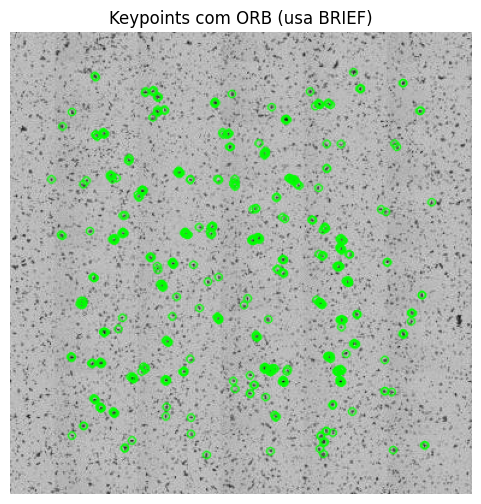

Formato do descritor: (477, 32)
Exemplo de vetor: [ 25  78  19 172  22 130 170 112 212 204 218 231  45 131 178 192 126 105
 142 231 133 169   4 174 176 228 170 128  55  47  53 201]


In [ ]:
#testando o BRIEF em uma imagem 2x2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lê a imagem em escala de cinza
img = cv2.imread('/content/Easyflowing_split_2x2/Sodium stearyl fumarate_11mm_part2.jpg')

# Inicializa o ORB (usa BRIEF internamente)
orb = cv2.ORB_create()

# Detecta keypoints e extrai descritores
keypoints, descriptors = orb.detectAndCompute(img, None)

# Mostra os keypoints na imagem
img_kp = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

plt.figure(figsize=(6, 6))
plt.imshow(img_kp, cmap='gray')
plt.title("Keypoints com ORB (usa BRIEF)")
plt.axis("off")
plt.show()

# Informações
print("Formato do descritor:", descriptors.shape)
print("Exemplo de vetor:", descriptors[0])


In [ ]:
#Extraindo o descritor brief
from PIL import Image
from skimage import io, color
import os
import cv2

new_folder = ['Freeflowing_split_2x2', 'Cohesive_split_2x2', 'Easyflowing_split_2x2']

image_counter = 1

dfs = []
for folder in new_folder:
    folder_path = os.path.join(base_path, folder)
    class_name = folder.split('_split')[0]

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            imagem = io.imread(img_path)

            orb = cv2.ORB_create()
            keypoints, descriptors = orb.detectAndCompute(imagem, None)

            if descriptors is not None:
                df_feature = pd.DataFrame(descriptors)
                df_feature['Classe'] = class_name
                df_feature['ImageId'] = f'Foto_{image_counter}'
                dfs.append(df_feature)
                image_counter += 1


# Concatena os DataFrames em um único DataFrame
df_final = pd.concat(dfs,axis = 0, ignore_index=True)


In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,Classe,ImageId
0,67,145,38,141,21,214,184,35,79,69,...,15,60,154,67,150,12,189,86,Freeflowing,Foto_1
1,131,142,166,154,205,180,168,199,159,83,...,28,58,222,202,159,76,185,156,Freeflowing,Foto_1
2,7,129,23,217,181,214,40,35,156,9,...,141,182,154,67,144,8,185,36,Freeflowing,Foto_1
3,89,73,99,252,68,128,239,116,197,64,...,240,168,186,8,63,152,112,40,Freeflowing,Foto_1
4,183,68,10,232,71,70,95,64,129,160,...,241,193,143,253,53,57,48,162,Freeflowing,Foto_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149117,209,201,106,207,12,2,109,244,196,36,...,114,169,242,5,53,186,120,8,Easyflowing,Foto_386
149118,26,122,163,244,99,209,28,198,19,234,...,147,215,254,171,2,116,45,223,Easyflowing,Foto_386
149119,216,213,57,172,52,75,131,172,20,105,...,249,199,47,212,52,9,149,123,Easyflowing,Foto_386
149120,98,185,150,182,75,133,150,97,154,251,...,185,22,95,186,8,44,139,27,Easyflowing,Foto_386


In [ ]:
#Transformando as colunas do dataframe
n_features = df_final.shape[1] - 2
new_columns = [f"Feature_BRIEF_{i+1}" for i in range(n_features)] + ["Classe"] + ["ImageId"]
df_final.columns = new_columns

In [ ]:
df_final.index = df_final['ImageId']
df_final = df_final.drop('ImageId', axis = 1)
df_final

,Feature_BRIEF_1,Feature_BRIEF_2,Feature_BRIEF_3,Feature_BRIEF_4,Feature_BRIEF_5,Feature_BRIEF_6,Feature_BRIEF_7,Feature_BRIEF_8,Feature_BRIEF_9,Feature_BRIEF_10,...,Feature_BRIEF_24,Feature_BRIEF_25,Feature_BRIEF_26,Feature_BRIEF_27,Feature_BRIEF_28,Feature_BRIEF_29,Feature_BRIEF_30,Feature_BRIEF_31,Feature_BRIEF_32,Classe
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,67,145,38,141,21,214,184,35,79,69,...,213,15,60,154,67,150,12,189,86,Freeflowing
Foto_1,131,142,166,154,205,180,168,199,159,83,...,243,28,58,222,202,159,76,185,156,Freeflowing
Foto_1,7,129,23,217,181,214,40,35,156,9,...,215,141,182,154,67,144,8,185,36,Freeflowing
Foto_1,89,73,99,252,68,128,239,116,197,64,...,253,240,168,186,8,63,152,112,40,Freeflowing
Foto_1,183,68,10,232,71,70,95,64,129,160,...,202,241,193,143,253,53,57,48,162,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_386,209,201,106,207,12,2,109,244,196,36,...,217,114,169,242,5,53,186,120,8,Easyflowing
Foto_386,26,122,163,244,99,209,28,198,19,234,...,202,147,215,254,171,2,116,45,223,Easyflowing
Foto_386,216,213,57,172,52,75,131,172,20,105,...,63,249,199,47,212,52,9,149,123,Easyflowing


In [ ]:
Classe = df_final['Classe']
df_scaler = df_final.drop('Classe', axis = 1)

In [ ]:
df_scaler

,Feature_BRIEF_1,Feature_BRIEF_2,Feature_BRIEF_3,Feature_BRIEF_4,Feature_BRIEF_5,Feature_BRIEF_6,Feature_BRIEF_7,Feature_BRIEF_8,Feature_BRIEF_9,Feature_BRIEF_10,...,Feature_BRIEF_23,Feature_BRIEF_24,Feature_BRIEF_25,Feature_BRIEF_26,Feature_BRIEF_27,Feature_BRIEF_28,Feature_BRIEF_29,Feature_BRIEF_30,Feature_BRIEF_31,Feature_BRIEF_32
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,67,145,38,141,21,214,184,35,79,69,...,53,213,15,60,154,67,150,12,189,86
Foto_1,131,142,166,154,205,180,168,199,159,83,...,30,243,28,58,222,202,159,76,185,156
Foto_1,7,129,23,217,181,214,40,35,156,9,...,51,215,141,182,154,67,144,8,185,36
Foto_1,89,73,99,252,68,128,239,116,197,64,...,6,253,240,168,186,8,63,152,112,40
Foto_1,183,68,10,232,71,70,95,64,129,160,...,64,202,241,193,143,253,53,57,48,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_386,209,201,106,207,12,2,109,244,196,36,...,165,217,114,169,242,5,53,186,120,8
Foto_386,26,122,163,244,99,209,28,198,19,234,...,160,202,147,215,254,171,2,116,45,223
Foto_386,216,213,57,172,52,75,131,172,20,105,...,105,63,249,199,47,212,52,9,149,123


In [ ]:
df_agrupado = df_scaler.groupby(df_scaler.index).mean()
df_agrupado

,Feature_BRIEF_1,Feature_BRIEF_2,Feature_BRIEF_3,Feature_BRIEF_4,Feature_BRIEF_5,Feature_BRIEF_6,Feature_BRIEF_7,Feature_BRIEF_8,Feature_BRIEF_9,Feature_BRIEF_10,...,Feature_BRIEF_23,Feature_BRIEF_24,Feature_BRIEF_25,Feature_BRIEF_26,Feature_BRIEF_27,Feature_BRIEF_28,Feature_BRIEF_29,Feature_BRIEF_30,Feature_BRIEF_31,Feature_BRIEF_32
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,89.789579,108.432866,122.991984,189.148297,122.779559,132.833667,153.605210,125.805611,104.454910,108.969940,...,87.208417,193.314629,123.118236,124.773547,171.046092,131.478958,106.334669,127.601202,133.478958,133.985972
Foto_10,60.689150,112.765396,93.829912,176.900293,104.126100,135.419355,166.046921,136.879765,91.530792,63.964809,...,56.824047,207.914956,90.431085,90.935484,166.398827,134.944282,80.850440,90.841642,128.601173,127.214076
Foto_100,55.713514,107.724324,85.572973,172.108108,110.070270,124.578378,170.378378,138.194595,80.172973,67.291892,...,48.637838,204.902703,86.281081,88.059459,162.037838,133.800000,77.140541,117.286486,129.135135,135.016216
Foto_101,79.533333,105.357895,108.175439,187.147368,112.028070,131.533333,149.185965,119.905263,98.112281,98.098246,...,79.877193,189.207018,135.217544,131.810526,169.515789,120.912281,95.263158,116.277193,130.950877,124.526316
Foto_102,68.022901,103.954198,98.740458,174.396947,111.839695,117.267176,153.137405,140.229008,85.977099,96.732824,...,58.748092,198.564885,102.763359,98.335878,163.106870,123.969466,77.793893,115.862595,113.458015,132.778626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_95,72.510549,118.763713,95.082278,181.896624,121.409283,136.417722,162.481013,136.852321,99.542194,74.664557,...,58.723629,206.181435,114.502110,107.139241,175.234177,141.257384,88.860759,101.943038,143.995781,127.759494
Foto_96,71.469474,116.564211,89.612632,183.648421,111.507368,132.905263,168.707368,137.528421,93.808421,66.543158,...,57.941053,202.515789,111.593684,104.240000,173.273684,139.008421,83.635789,105.623158,142.391579,128.048421
Foto_97,68.824691,108.328395,85.795062,178.866667,106.545679,135.459259,170.938272,136.874074,90.516049,65.767901,...,53.980247,208.567901,106.392593,97.733333,170.172840,128.614815,73.874074,99.044444,131.232099,131.874074


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalizado = scaler.fit_transform(df_agrupado)
df_normalizado = pd.DataFrame(normalizado)
df_normalizado

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.864554,-0.379756,1.408385,0.577055,0.724872,0.092220,-0.250100,-0.549259,0.867601,1.389671,...,1.274849,-0.389196,0.595039,1.000762,0.273190,-0.022429,1.586612,1.418596,0.225735,0.257193
1,-0.972697,0.007325,-0.560847,-0.628616,-0.700297,0.295180,0.570705,0.594327,-0.410598,-1.171619,...,-0.639328,0.737657,-1.595731,-1.254912,-0.228699,0.246393,-0.518790,-1.393859,-0.183255,-0.161291
2,-1.286833,-0.443059,-1.118414,-1.100350,-0.246148,-0.555768,0.856461,0.730104,-1.533889,-0.982271,...,-1.155048,0.505172,-1.873874,-1.446630,-0.699671,0.157626,-0.825287,0.629422,-0.138483,0.320859
3,0.217027,-0.654484,0.407866,0.380087,-0.096568,-0.009848,-0.541647,-1.158566,0.240313,0.770951,...,0.812991,-0.706222,1.405963,1.469853,0.107922,-0.842138,0.671929,0.552202,0.013762,-0.327387
4,-0.509682,-0.779894,-0.229251,-0.875041,-0.110960,-1.129651,-0.280962,0.940190,-0.959859,0.693243,...,-0.518115,0.016019,-0.769193,-0.761595,-0.584219,-0.604977,-0.771309,0.520481,-1.452967,0.182583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,-0.226355,0.543234,-0.476278,-0.136786,0.620179,0.373546,0.335455,0.591493,0.381732,-0.562685,...,-0.519657,0.603864,0.017566,-0.174755,0.725489,0.736132,0.142989,-0.544497,1.107542,-0.127585
382,-0.292083,0.346723,-0.845628,0.035657,-0.136351,0.097840,0.746221,0.661311,-0.185339,-1.024883,...,-0.568958,0.320949,-0.177364,-0.368021,0.513762,0.561669,-0.288676,-0.262933,0.973034,-0.109730
383,-0.459061,-0.389090,-1.103417,-0.435050,-0.515436,0.298312,0.893398,0.593739,-0.510956,-1.069003,...,-0.818484,0.788052,-0.525953,-0.801761,0.178881,-0.244615,-1.095149,-0.766267,0.037341,0.126684
384,-0.302909,0.341627,0.405306,-0.045095,0.750033,0.985350,0.396158,-0.387158,-0.046522,0.087808,...,0.321251,0.485259,0.383743,0.379619,-1.441786,0.054889,0.269540,-0.030879,0.032536,1.385105


In [ ]:
#Arrumando as colunas do dataframe novamente
n_features = df_normalizado.shape[1]
new_columns = [f"Feature_BRIEF_{i+1}" for i in range(n_features)]
df_normalizado.columns = new_columns
df_normalizado.index.name = 'ImageId'
df_normalizado.index = df_agrupado.index
df_normalizado

,Feature_BRIEF_1,Feature_BRIEF_2,Feature_BRIEF_3,Feature_BRIEF_4,Feature_BRIEF_5,Feature_BRIEF_6,Feature_BRIEF_7,Feature_BRIEF_8,Feature_BRIEF_9,Feature_BRIEF_10,...,Feature_BRIEF_23,Feature_BRIEF_24,Feature_BRIEF_25,Feature_BRIEF_26,Feature_BRIEF_27,Feature_BRIEF_28,Feature_BRIEF_29,Feature_BRIEF_30,Feature_BRIEF_31,Feature_BRIEF_32
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,0.864554,-0.379756,1.408385,0.577055,0.724872,0.092220,-0.250100,-0.549259,0.867601,1.389671,...,1.274849,-0.389196,0.595039,1.000762,0.273190,-0.022429,1.586612,1.418596,0.225735,0.257193
Foto_10,-0.972697,0.007325,-0.560847,-0.628616,-0.700297,0.295180,0.570705,0.594327,-0.410598,-1.171619,...,-0.639328,0.737657,-1.595731,-1.254912,-0.228699,0.246393,-0.518790,-1.393859,-0.183255,-0.161291
Foto_100,-1.286833,-0.443059,-1.118414,-1.100350,-0.246148,-0.555768,0.856461,0.730104,-1.533889,-0.982271,...,-1.155048,0.505172,-1.873874,-1.446630,-0.699671,0.157626,-0.825287,0.629422,-0.138483,0.320859
Foto_101,0.217027,-0.654484,0.407866,0.380087,-0.096568,-0.009848,-0.541647,-1.158566,0.240313,0.770951,...,0.812991,-0.706222,1.405963,1.469853,0.107922,-0.842138,0.671929,0.552202,0.013762,-0.327387
Foto_102,-0.509682,-0.779894,-0.229251,-0.875041,-0.110960,-1.129651,-0.280962,0.940190,-0.959859,0.693243,...,-0.518115,0.016019,-0.769193,-0.761595,-0.584219,-0.604977,-0.771309,0.520481,-1.452967,0.182583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_95,-0.226355,0.543234,-0.476278,-0.136786,0.620179,0.373546,0.335455,0.591493,0.381732,-0.562685,...,-0.519657,0.603864,0.017566,-0.174755,0.725489,0.736132,0.142989,-0.544497,1.107542,-0.127585
Foto_96,-0.292083,0.346723,-0.845628,0.035657,-0.136351,0.097840,0.746221,0.661311,-0.185339,-1.024883,...,-0.568958,0.320949,-0.177364,-0.368021,0.513762,0.561669,-0.288676,-0.262933,0.973034,-0.109730
Foto_97,-0.459061,-0.389090,-1.103417,-0.435050,-0.515436,0.298312,0.893398,0.593739,-0.510956,-1.069003,...,-0.818484,0.788052,-0.525953,-0.801761,0.178881,-0.244615,-1.095149,-0.766267,0.037341,0.126684


In [ ]:
df_classe =Classe.groupby(Classe.index).first()
df_classe

,Classe
ImageId,
Foto_1,Freeflowing
Foto_10,Freeflowing
Foto_100,Freeflowing
Foto_101,Freeflowing
Foto_102,Freeflowing
...,...
Foto_95,Freeflowing
Foto_96,Freeflowing
Foto_97,Freeflowing


In [ ]:
df_brief = df_normalizado.copy()
df_brief['Classe'] = df_classe
df_brief

,Feature_BRIEF_1,Feature_BRIEF_2,Feature_BRIEF_3,Feature_BRIEF_4,Feature_BRIEF_5,Feature_BRIEF_6,Feature_BRIEF_7,Feature_BRIEF_8,Feature_BRIEF_9,Feature_BRIEF_10,...,Feature_BRIEF_24,Feature_BRIEF_25,Feature_BRIEF_26,Feature_BRIEF_27,Feature_BRIEF_28,Feature_BRIEF_29,Feature_BRIEF_30,Feature_BRIEF_31,Feature_BRIEF_32,Classe
ImageId,,,,,,,,,,,,,,,,,,,,,
Foto_1,0.864554,-0.379756,1.408385,0.577055,0.724872,0.092220,-0.250100,-0.549259,0.867601,1.389671,...,-0.389196,0.595039,1.000762,0.273190,-0.022429,1.586612,1.418596,0.225735,0.257193,Freeflowing
Foto_10,-0.972697,0.007325,-0.560847,-0.628616,-0.700297,0.295180,0.570705,0.594327,-0.410598,-1.171619,...,0.737657,-1.595731,-1.254912,-0.228699,0.246393,-0.518790,-1.393859,-0.183255,-0.161291,Freeflowing
Foto_100,-1.286833,-0.443059,-1.118414,-1.100350,-0.246148,-0.555768,0.856461,0.730104,-1.533889,-0.982271,...,0.505172,-1.873874,-1.446630,-0.699671,0.157626,-0.825287,0.629422,-0.138483,0.320859,Freeflowing
Foto_101,0.217027,-0.654484,0.407866,0.380087,-0.096568,-0.009848,-0.541647,-1.158566,0.240313,0.770951,...,-0.706222,1.405963,1.469853,0.107922,-0.842138,0.671929,0.552202,0.013762,-0.327387,Freeflowing
Foto_102,-0.509682,-0.779894,-0.229251,-0.875041,-0.110960,-1.129651,-0.280962,0.940190,-0.959859,0.693243,...,0.016019,-0.769193,-0.761595,-0.584219,-0.604977,-0.771309,0.520481,-1.452967,0.182583,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foto_95,-0.226355,0.543234,-0.476278,-0.136786,0.620179,0.373546,0.335455,0.591493,0.381732,-0.562685,...,0.603864,0.017566,-0.174755,0.725489,0.736132,0.142989,-0.544497,1.107542,-0.127585,Freeflowing
Foto_96,-0.292083,0.346723,-0.845628,0.035657,-0.136351,0.097840,0.746221,0.661311,-0.185339,-1.024883,...,0.320949,-0.177364,-0.368021,0.513762,0.561669,-0.288676,-0.262933,0.973034,-0.109730,Freeflowing
Foto_97,-0.459061,-0.389090,-1.103417,-0.435050,-0.515436,0.298312,0.893398,0.593739,-0.510956,-1.069003,...,0.788052,-0.525953,-0.801761,0.178881,-0.244615,-1.095149,-0.766267,0.037341,0.126684,Freeflowing


In [ ]:
#Salvando os descritores brief em um csv
df_brief.to_csv('features_2x2_brief.csv', index_label=)

In [ ]:
pd.read_csv('/content/features_2x2_brief.csv')

,ImageId,Feature_BRIEF_1,Feature_BRIEF_2,Feature_BRIEF_3,Feature_BRIEF_4,Feature_BRIEF_5,Feature_BRIEF_6,Feature_BRIEF_7,Feature_BRIEF_8,Feature_BRIEF_9,...,Feature_BRIEF_24,Feature_BRIEF_25,Feature_BRIEF_26,Feature_BRIEF_27,Feature_BRIEF_28,Feature_BRIEF_29,Feature_BRIEF_30,Feature_BRIEF_31,Feature_BRIEF_32,Classe
0,Foto_1,0.864554,-0.379756,1.408385,0.577055,0.724872,0.092220,-0.250100,-0.549259,0.867601,...,-0.389196,0.595039,1.000762,0.273190,-0.022429,1.586612,1.418596,0.225735,0.257193,Freeflowing
1,Foto_10,-0.972697,0.007325,-0.560847,-0.628616,-0.700297,0.295180,0.570705,0.594327,-0.410598,...,0.737657,-1.595731,-1.254912,-0.228699,0.246393,-0.518790,-1.393859,-0.183255,-0.161291,Freeflowing
2,Foto_100,-1.286833,-0.443059,-1.118414,-1.100350,-0.246148,-0.555768,0.856461,0.730104,-1.533889,...,0.505172,-1.873874,-1.446630,-0.699671,0.157626,-0.825287,0.629422,-0.138483,0.320859,Freeflowing
3,Foto_101,0.217027,-0.654484,0.407866,0.380087,-0.096568,-0.009848,-0.541647,-1.158566,0.240313,...,-0.706222,1.405963,1.469853,0.107922,-0.842138,0.671929,0.552202,0.013762,-0.327387,Freeflowing
4,Foto_102,-0.509682,-0.779894,-0.229251,-0.875041,-0.110960,-1.129651,-0.280962,0.940190,-0.959859,...,0.016019,-0.769193,-0.761595,-0.584219,-0.604977,-0.771309,0.520481,-1.452967,0.182583,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Foto_95,-0.226355,0.543234,-0.476278,-0.136786,0.620179,0.373546,0.335455,0.591493,0.381732,...,0.603864,0.017566,-0.174755,0.725489,0.736132,0.142989,-0.544497,1.107542,-0.127585,Freeflowing
382,Foto_96,-0.292083,0.346723,-0.845628,0.035657,-0.136351,0.097840,0.746221,0.661311,-0.185339,...,0.320949,-0.177364,-0.368021,0.513762,0.561669,-0.288676,-0.262933,0.973034,-0.109730,Freeflowing
383,Foto_97,-0.459061,-0.389090,-1.103417,-0.435050,-0.515436,0.298312,0.893398,0.593739,-0.510956,...,0.788052,-0.525953,-0.801761,0.178881,-0.244615,-1.095149,-0.766267,0.037341,0.126684,Freeflowing
384,Foto_98,-0.302909,0.341627,0.405306,-0.045095,0.750033,0.985350,0.396158,-0.387158,-0.046522,...,0.485259,0.383743,0.379619,-1.441786,0.054889,0.269540,-0.030879,0.032536,1.385105,Freeflowing


In [ ]:
pd.read_csv('/content/features_2x2_daisy.csv')

,ImageId,Feature_DAISY_1,Feature_DAISY_2,Feature_DAISY_3,Feature_DAISY_4,Feature_DAISY_5,Feature_DAISY_6,Feature_DAISY_7,Feature_DAISY_8,Feature_DAISY_9,...,Feature_DAISY_28,Feature_DAISY_29,Feature_DAISY_30,Feature_DAISY_31,Feature_DAISY_32,Feature_DAISY_33,Feature_DAISY_34,Feature_DAISY_35,Feature_DAISY_36,Classe
0,Foto_1,0.092809,0.111043,0.108906,0.112648,0.027849,0.054621,0.061039,0.056668,0.048934,...,-0.075850,-0.058636,-0.062238,-0.072572,-0.066374,-0.067312,-0.053605,-0.062048,-0.070223,Freeflowing
1,Foto_10,-0.161420,-0.259410,-0.159751,-0.251301,-0.035195,-0.145270,-0.085666,-0.145079,-0.088158,...,0.110193,0.117059,0.036912,0.130594,0.040422,0.218553,0.113127,0.208163,0.129524,Freeflowing
2,Foto_100,-0.010998,-0.066105,-0.033053,-0.040037,0.023605,-0.030390,0.007489,-0.011780,0.006255,...,-0.002877,-0.011494,-0.047683,-0.010956,-0.034254,0.077115,0.017328,0.061323,0.033576,Freeflowing
3,Foto_101,-0.153899,-0.070456,-0.067802,-0.090916,-0.059762,-0.044905,-0.059359,-0.059150,-0.089923,...,0.122368,0.089172,0.117885,0.121758,0.118103,-0.041957,-0.016265,-0.004714,-0.002030,Freeflowing
4,Foto_102,0.015534,-0.001164,-0.016672,0.001690,0.023484,0.027736,0.030634,0.026956,0.026099,...,-0.023144,-0.079295,-0.087267,-0.088253,-0.078374,0.009787,0.008169,-0.001232,0.013650,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Foto_95,-0.042160,-0.045820,-0.037647,-0.052290,-0.003191,0.006712,0.011652,-0.003357,-0.030768,...,0.041331,0.002302,-0.008922,-0.011999,-0.010058,0.035577,0.028842,0.038890,0.027124,Freeflowing
384,Foto_96,-0.103326,-0.137418,-0.117763,-0.135124,-0.036369,-0.056871,-0.044778,-0.054962,-0.020147,...,0.021445,0.054648,0.047762,0.060414,0.047814,0.117158,0.105702,0.112887,0.108552,Freeflowing
385,Foto_97,-0.168795,-0.220553,-0.215752,-0.214293,-0.067028,-0.100755,-0.090935,-0.098639,-0.078297,...,0.128310,0.143381,0.129975,0.136712,0.136821,0.111578,0.090778,0.101943,0.099425,Freeflowing
386,Foto_98,-0.074566,0.003155,-0.090301,-0.009880,-0.084783,-0.007071,-0.075404,-0.016425,-0.045085,...,0.051868,-0.028291,0.031295,-0.027862,0.040041,0.031135,0.087607,0.029390,0.102265,Freeflowing


In [ ]:
pd.read_csv('/content/features_2x2_hog.csv')

,ImageId,Feature_HOG_1,Feature_HOG_2,Feature_HOG_3,Feature_HOG_4,Feature_HOG_5,Feature_HOG_6,Feature_HOG_7,Feature_HOG_8,Feature_HOG_9,...,Feature_HOG_342,Feature_HOG_343,Feature_HOG_344,Feature_HOG_345,Feature_HOG_346,Feature_HOG_347,Feature_HOG_348,Feature_HOG_349,Feature_HOG_350,Classe
0,Foto_1,-0.966522,-0.500102,-0.162539,-0.050790,0.378541,0.592698,0.071548,0.005202,0.085063,...,-0.202825,-0.558604,0.603191,0.530848,-0.245614,-0.040165,0.377063,-0.382588,-0.030844,Freeflowing
1,Foto_2,1.795851,-1.121593,-0.822332,0.397759,-0.833528,-1.315762,-0.219496,-1.280380,0.157021,...,0.508091,0.407251,-0.409634,0.256755,-0.731217,-0.339310,-0.438973,-0.167645,0.086761,Freeflowing
2,Foto_3,0.281772,-1.147847,2.298021,-1.246245,2.470343,2.192057,0.855575,-1.267350,-0.057988,...,-0.558393,0.025854,0.109173,1.158874,-0.371895,0.234164,0.417924,0.542622,-0.459618,Freeflowing
3,Foto_4,-0.170698,1.165726,1.749009,2.008803,0.364218,-0.940929,-0.277213,-0.127242,0.134653,...,0.096831,-0.539533,-0.095052,-0.061394,-0.477368,0.186124,0.358969,-0.137532,-0.049924,Freeflowing
4,Foto_5,-0.401164,-0.700844,1.086648,-0.644698,0.968589,1.180255,0.382467,-0.695183,0.382746,...,-0.368862,-0.150389,0.039318,0.049031,0.258991,0.472456,0.113076,0.218794,0.491912,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Foto_384,-1.425479,-0.304649,-0.824996,0.307242,-0.139401,0.164369,-0.486494,-0.417641,0.079455,...,1.598182,0.053742,-0.250843,0.882174,1.524772,1.069449,-0.535419,0.512045,1.846476,Easyflowing
384,Foto_385,-1.451491,-0.295515,-1.064732,0.406176,-0.140298,0.105402,-0.352019,-0.329296,0.152372,...,0.018113,0.278428,-0.286580,-0.811308,0.449155,0.918488,-0.167296,0.762931,-0.652977,Easyflowing
385,Foto_386,-0.898532,0.154126,-0.496505,0.331126,-0.046667,0.232525,0.244900,0.097598,-0.135313,...,0.630499,-0.018680,-0.711885,-0.063509,0.092910,0.022358,-0.083083,-0.630568,-0.621045,Easyflowing
386,Foto_387,0.424126,-0.923727,-0.196020,0.273249,0.936376,-0.009730,-0.198913,0.527572,0.708251,...,0.222823,-0.319030,-0.099440,-0.508019,0.011232,-0.075081,0.019594,0.454555,-0.393616,Easyflowing


In [ ]:
pd.read_csv('/content/features_2x2_lbp.csv')

,ImageId,Feature_LBP_1,Feature_LBP_2,Feature_LBP_3,Feature_LBP_4,Feature_LBP_5,Feature_LBP_6,Feature_LBP_7,Feature_LBP_8,Feature_LBP_9,Feature_LBP_10,Classe
0,Foto_1,-0.518991,-0.107627,-1.732197,-0.714230,-0.576564,0.804821,-0.475766,0.249252,1.201474,1.869827,Freeflowing
1,Foto_2,-0.656940,-0.556526,-0.683426,-0.267897,-0.514759,1.150753,-0.363993,-0.334839,2.597877,-0.370251,Freeflowing
2,Foto_3,-1.021886,-0.704129,-1.053477,0.008714,-0.290635,1.746369,-0.229222,-0.083085,2.003677,-0.376324,Freeflowing
3,Foto_4,-1.077125,-0.679460,-1.177842,-0.066688,-0.238465,1.697965,-0.238946,-0.067555,1.991063,-0.142948,Freeflowing
4,Foto_5,-1.049946,-0.615233,-1.439097,-0.194201,-0.328436,1.716833,-0.275129,0.071170,1.778013,0.336025,Freeflowing
...,...,...,...,...,...,...,...,...,...,...,...,...
383,Foto_384,1.038610,0.166092,-1.056260,-1.117280,-0.954397,-0.401567,-0.527862,0.221035,0.402759,2.228871,Easyflowing
384,Foto_385,1.061515,0.200808,-0.983160,-1.066415,-1.006744,-0.614561,-0.594840,0.254685,0.618912,2.129800,Easyflowing
385,Foto_386,-0.789645,-0.284348,-1.581309,-0.651185,-0.522173,1.144558,-0.426228,0.118326,1.737492,1.254511,Easyflowing
386,Foto_387,-0.806597,-0.588509,-0.949908,-0.310865,-0.460264,1.356641,-0.323354,-0.199635,2.406647,-0.124156,Easyflowing
